===========================================마감기한=============================================
                count unique                   top freq
CompanyName                                            
(주)디자인시티커뮤니케이션      1      1   ~ 12/21(월)(9일 전 등록)    1
(주)에이오엠종합건축사사무소     1      1   ~ 12/18(금)(7일 전 등록)    1
(주)인화기업             1      1         오늘마감(1일 전 등록)    1
(주)크리액티브헬스          1      1  ~ 12/25(금)(15일 전 등록)    1
(주)페이타랩             1      1  ~ 12/12(토)(58일 전 등록)    1
DO Media            1      1  ~ 12/22(화)(26일 전 등록)    1
더마트                 1      1   ~ 01/30(토)(9일 전 등록)    1
소프트하이               1      1   ~ 12/12(토)(9일 전 등록)    1
스탭스 (주)             1      1   ~ 12/13(일)(9일 전 등록)    1
포루스기획               1      1   ~ 02/06(토)(2일 전 등록)    1

===========================================회사위치=============================================
                count unique     top freq
CompanyName                              
(주)디자인시티커뮤니케이션      1      1  경기 부천시    1
(주)에이오엠종합건축사사무소

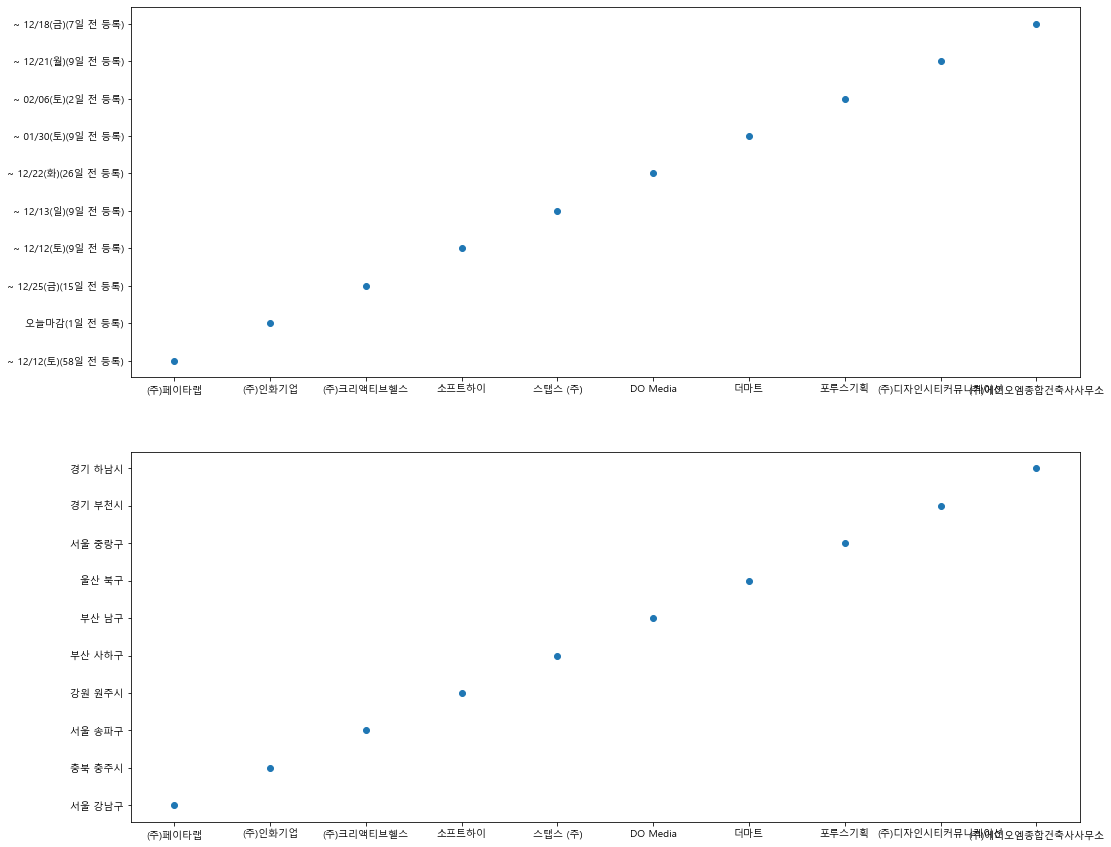

In [21]:
#이 프로젝트는 사람인 포털사이트의 자료를 크롤링하여 기업별 마감기한 및 기업별 위치를 가져와 하나씩 매칭해주어
#구직자가 마감기한과 기업별 위치를 파악할 때에 매우 유용할 것이라는 생각이 들어 만들었습니다.

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() #그래프 내부의 한글 출력
rc('font', family=font_name)

data1 = {'CompanyName' : [] , 'Deadline' : []} # 이름, 날짜
data2 = {'CompanyName' : [] , 'WorkPlace' : []} # 이름, 지역 

response = requests.get('http://www.saramin.co.kr/zf_user/jobs/list/job-category')

html = response.text
soup = BeautifulSoup(html, 'html.parser')

employ_list = soup.select('div.list_body > div.list_item') # 회사 이름 클래스 선택
i=0
for emp in employ_list:
    companytitle = emp.select_one('a.str_tit').text #a.str_tit 회사 이름
    dead = emp.select_one('p.deadlines').text  #p.deadlines 회사 지원 마감기한
    work = emp.select_one('p.work_place').text #p.work_place 회사 위치
    data1['CompanyName'].append(companytitle) 
    data1['Deadline'].append(dead)
    data2['CompanyName'].append(companytitle)
    data2['WorkPlace'].append(work)
    i+=1
    if i == 10: break #데이터 양이 너무 많아서 데이터를 10개까지만 출력하게 만드는 부분 필요에 따라 데이터 양을 조절할 수 있음


dataframe1 = pd.DataFrame(data1)
dataframe2 = pd.DataFrame(data2)


fig = plt.figure(figsize=(17,15)) 

axe1 = fig.add_subplot(2,1,1) #데이터 그래프를 2개로 나누어 표현
axe2 = fig.add_subplot(2,1,2)

axe1.scatter(dataframe1['CompanyName'], dataframe1['Deadline']) #회사이름 공고 마감기한 그래프
axe2.scatter(dataframe2['CompanyName'], dataframe2['WorkPlace']) #회사이름 위치 그래프

gr1 = dataframe1.groupby('CompanyName')['Deadline'].describe()
gr2 = dataframe2.groupby('CompanyName')['WorkPlace'].describe()      

print('===========================================마감기한=============================================')
print(gr1)
print()
print('===========================================회사위치=============================================')
print(gr2)
print()
print('=========================================dataframe1==========================================')
print(dataframe1)
print()
print('=========================================dataframe2==========================================')
print(dataframe2)
print()
print()